# __TEAM RAVENS__
| __Name__ | __Registration Number__ | __Access Number__ | __Role__ |
|------|---------------------|---------------|----------|
|Lorraine Paula Arinaitwe|M23B38/004|B20729|Model training & Streamlit Integration|
|Rugogamu Noela|S23B38/016|B22775|Model training and evaluation, xAI & Fairness plus UI development|
|Ssendi Aloysious Malon|S23B38/002|B21258|Data Collection, Understanding and Pre processing& Cleaning as well as UI development|

# __Notebook 1: Data Understanding & Cleaning__

## Objective
This notebook focuses on:
1. Loading and understanding the diabetes dataset
2. Handling missing values and data quality issues
3. Creating a data dictionary
4. Exploratory data analysis with visualizations
5. Feature selection using:
   - Domain knowledge (village health tool requirements)
   - Statistical methods (correlation, chi-square)
   - Machine learning-based selection (Random Forest Feature Importance)

## Why This Matters
For a village health tool, we need features that are:
- Easy to measure without advanced equipment
- Reliable and consistent
- Clinically relevant for Type 2 Diabetes prediction


## Step 1: Import Required Libraries


In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy.stats import chi2_contingency

# Machine learning for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seed for reproducibility
np.random.seed(42)


## Step 2: Load the Dataset


In [5]:
import pandas as pd
import os

# Get the directory of the current script
base_dir = os.getcwd()

# Construct the relative path to the data file
data_path = os.path.join(base_dir, '..', 'data', 'health care diabetes.csv')

# Check if the file exists before loading
if os.path.exists(data_path):
    pima_dbt = pd.read_csv(data_path)
    print(pima_dbt.head(10))
else:
    print(f"File not found at {data_path}. Ensure 'health care diabetes.csv' is in the 'data' subfolder relative to this script.")



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [6]:
pima_dbt.info() #General information on the structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Descriptive statistics
pima_dbt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Step 3: Creating Data Dictionary


In [8]:
# Create data dictionary
data_dictionary = {
    'Pregnancies': 'Number of times pregnant',
    'Glucose': 'Plasma glucose concentration (mg/dL)',
    'BloodPressure': 'Diastolic blood pressure (mm Hg)',
    'SkinThickness': 'Triceps skin fold thickness (mm)',
    'Insulin': '2-Hour serum insulin (mu U/ml) - Difficult (requires lab test)',
    'BMI': 'Body Mass Index',
    'DiabetesPedigreeFunction': 'Genetic risk score',
    'Age': 'Age in years',
    'Outcome': 'Target: 0=No diabetes, 1=Diabetes'
}

print("DATA DICTIONARY")
print("=" * 60)
for feature, description in data_dictionary.items():
    print(f"\n{feature}:\n  {description}")

DATA DICTIONARY

Pregnancies:
  Number of times pregnant

Glucose:
  Plasma glucose concentration (mg/dL)

BloodPressure:
  Diastolic blood pressure (mm Hg)

SkinThickness:
  Triceps skin fold thickness (mm)

Insulin:
  2-Hour serum insulin (mu U/ml) - Difficult (requires lab test)

BMI:
  Body Mass Index

DiabetesPedigreeFunction:
  Genetic risk score

Age:
  Age in years

Outcome:
  Target: 0=No diabetes, 1=Diabetes


## Step 4: Check for Missing Values


**Cardinality Summary**  
| Entity A         | Relationship      | Entity B         | Cardinality     |
|-------------------|-------------------|------------------|-----------------|
| districts         | has               | malaria_monthly | 1:N             |
| districts         | has               | alerts           | 1:N             |
| users             | belongs to        | districts        | N:0..1          |
| malaria_monthly   | triggers          | alerts           | 1:0..N (weak)   |
| users             | enters            | malaria_monthly  | 1:N             |

---

In [11]:
# Check for missing values
missing = pima_dbt.isnull().sum()
missing_percentage = (missing / len(pima_dbt)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0]

if len(missing_df) > 0:
    print("Columns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("No missing values found!")

# Check for zeros (often represent missing values in medical data)
print("\n" + "=" * 60)
print("CHECKING FOR ZEROS (POTENTIAL MISSING VALUES)")
print("=" * 60)

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (pima_dbt[col] == 0).sum()
    if zero_count > 0:
        print(f"{col}: {zero_count} zeros ({zero_count/len(pima_dbt)*100:.2f}%)")


No missing values found!

CHECKING FOR ZEROS (POTENTIAL MISSING VALUES)
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)


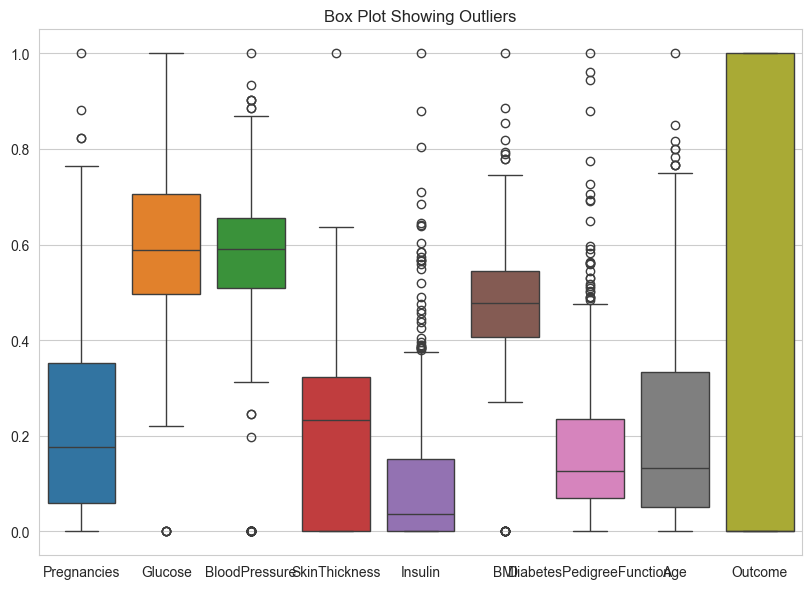

In [10]:
# Checking Outliers

from sklearn.preprocessing import MinMaxScaler # Data normalization

scaler = MinMaxScaler()
dtb_scaled = pd.DataFrame(scaler.fit_transform(pima_dbt), columns=pima_dbt.columns) # Scaling the data to a range of [0, 1] using MinMaxScaler

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=dtb_scaled)
plt.title("Box Plot Showing Outliers")
plt.tight_layout()
plt.show()

### _Decided not to remove outliers since it would cost the quality of this dataset for modelling. They also weren't so many to begin with._

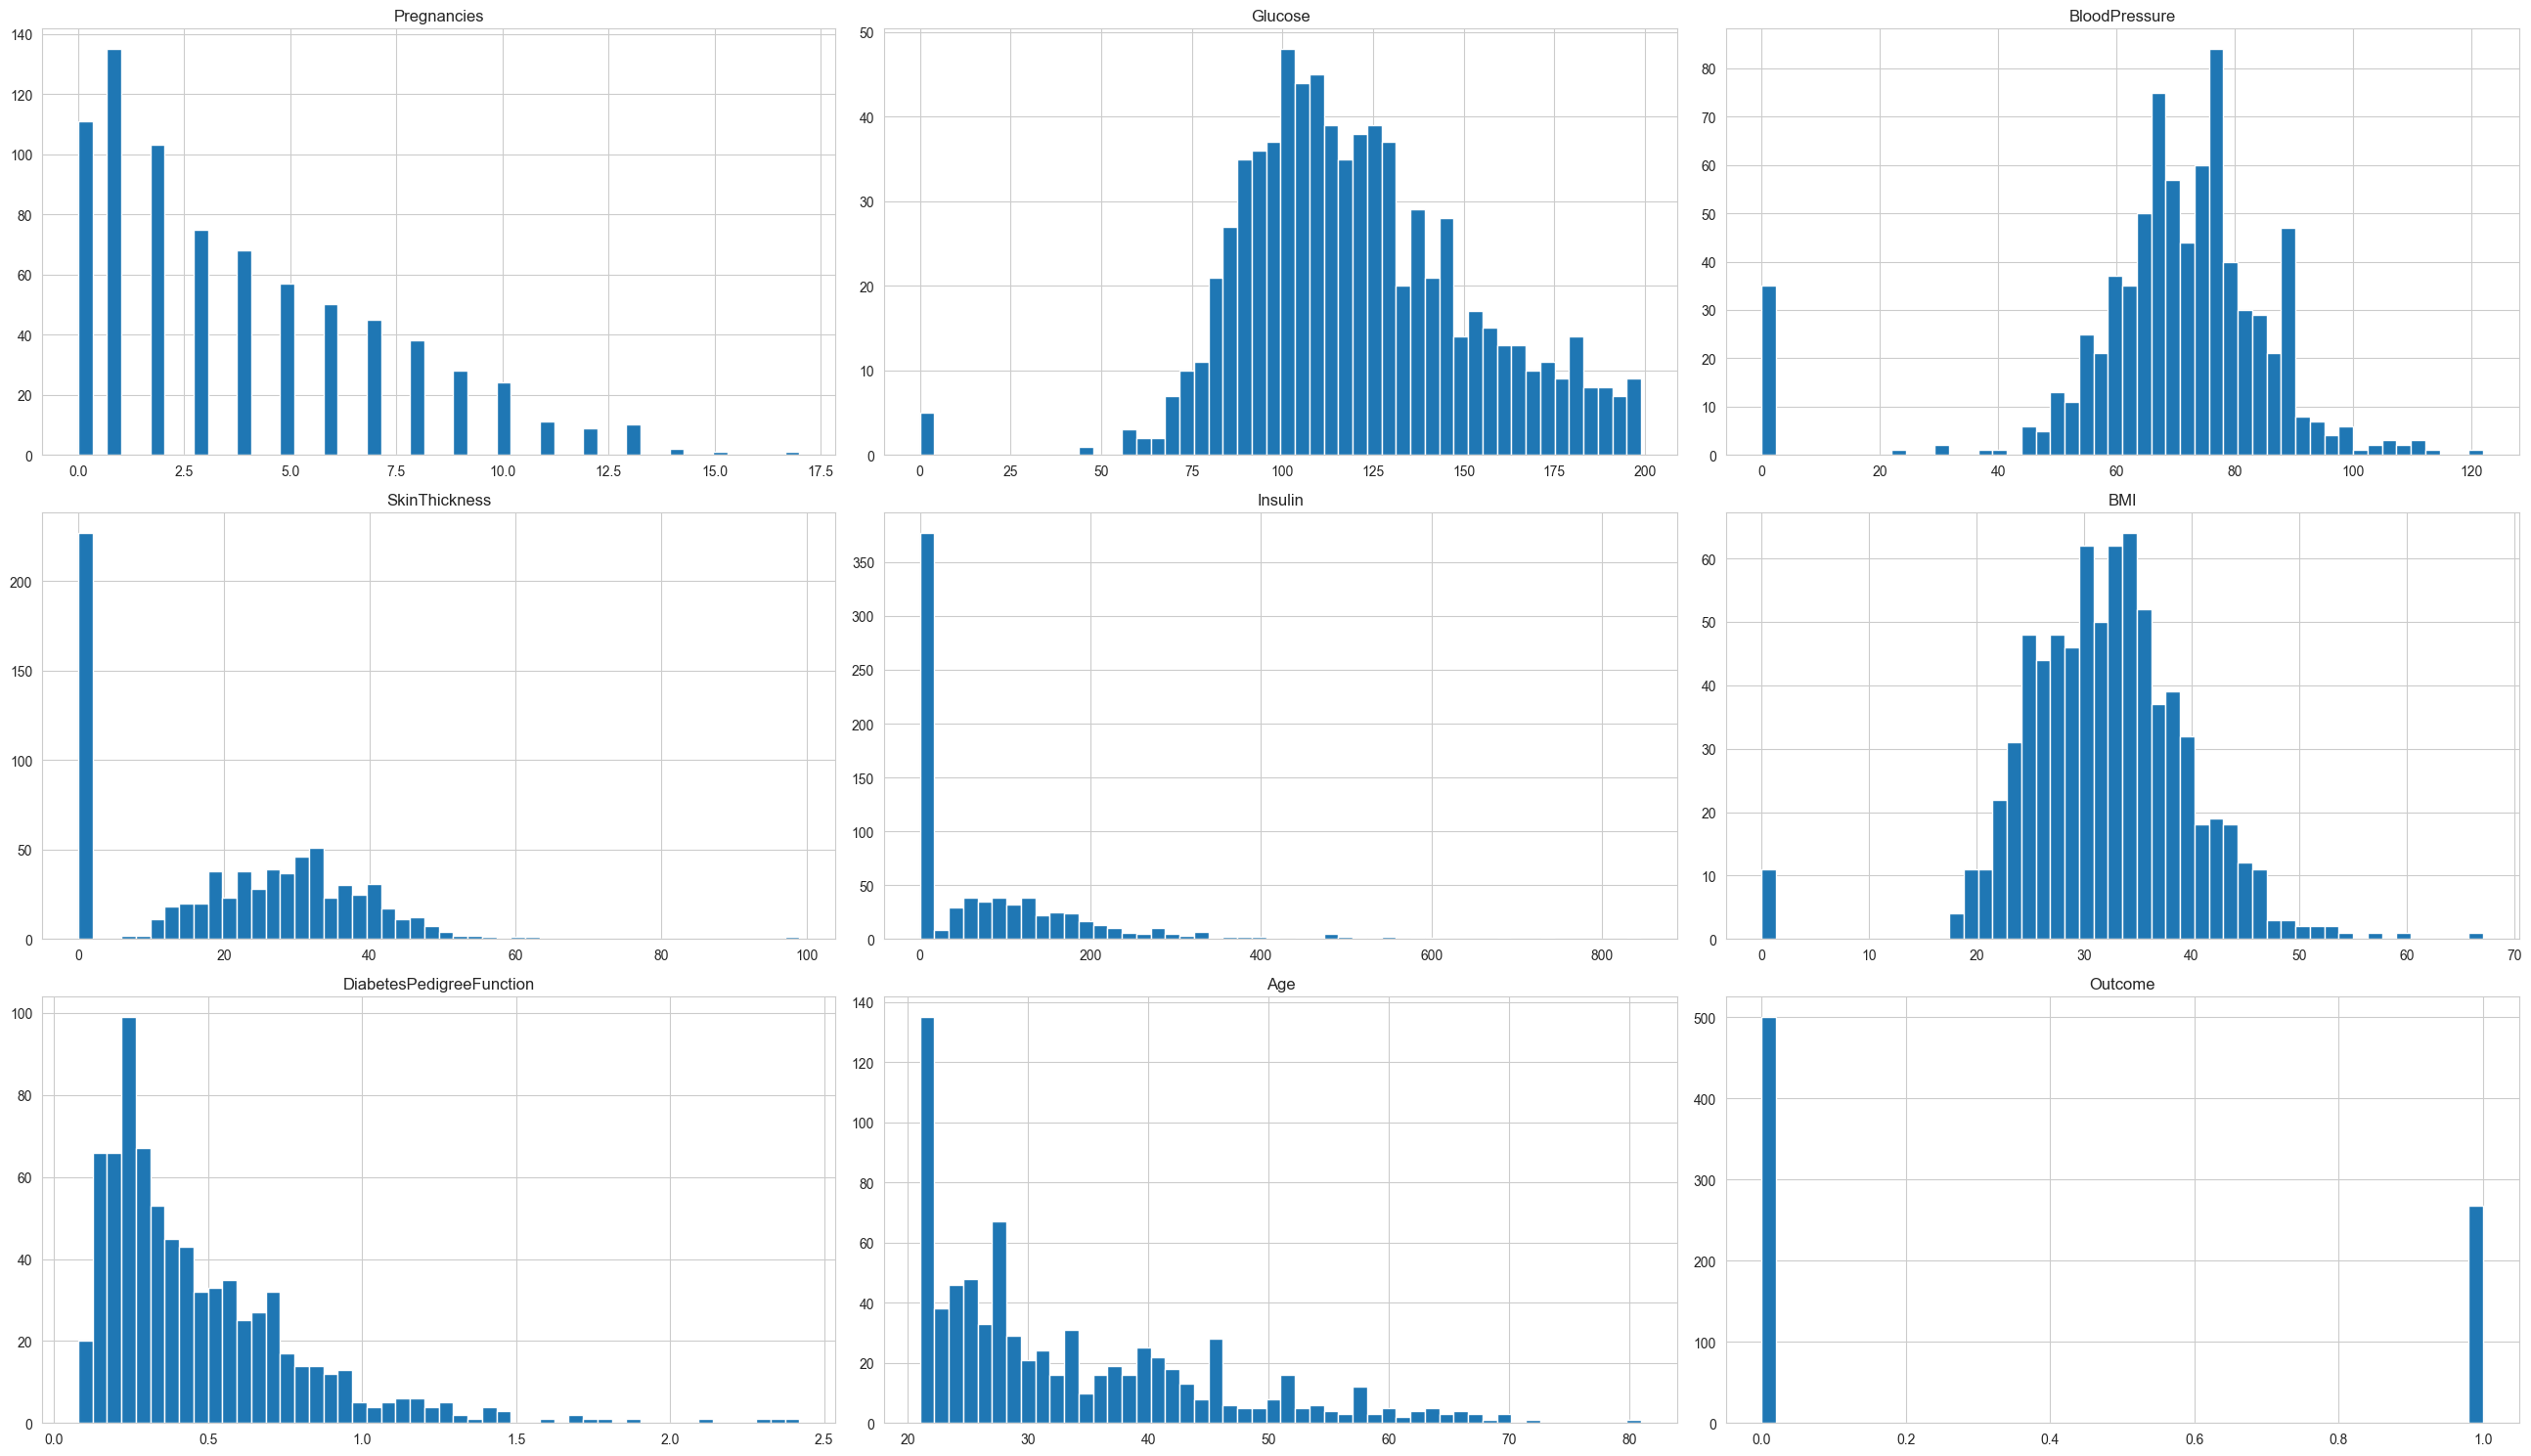

In [12]:
# Plot histograms for each numerical column

pima_dbt.hist(bins=50, figsize=(26, 15))
plt.tight_layout()
plt.show()

## Step 5: Data Cleaning


In [13]:
pima_dbt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Note: __5__ out of __9__ variables had potential missing values replaced with zeros even after checking for null spaces. Handling this issue by replacing them with the median values.

In [16]:
# Create a copy for cleaning
pima_dbt_clean = pima_dbt.copy()

print("DATA CLEANING PROCESS")
print("*" * 60)

# Handle zeros that represent missing values
features_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in features_to_check:
    zero_count = (pima_dbt_clean[feature] == 0).sum()
    if zero_count > 0:
        print(f"Replacing {zero_count} zeros in {feature} with median")
        pima_dbt_clean[feature] = pima_dbt_clean[feature].replace(0, np.nan)
        median_value = pima_dbt_clean[feature].median()
        pima_dbt_clean[feature] = pima_dbt_clean[feature].fillna(median_value)

# Handle any remaining missing values
numeric_cols = pima_dbt_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if pima_dbt_clean[col].isnull().sum() > 0:
        pima_dbt_clean[col].fillna(pima_dbt_clean[col].median(), inplace=True)

print("\nCleaning complete!")
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (pima_dbt_clean[col] == 0).sum()
    if zero_count > 0:
        print(f"{col}: {zero_count} zeros ({zero_count/len(pima_dbt_clean)*100:.2f}%)")

DATA CLEANING PROCESS
************************************************************
Replacing 5 zeros in Glucose with median
Replacing 35 zeros in BloodPressure with median
Replacing 227 zeros in SkinThickness with median
Replacing 374 zeros in Insulin with median
Replacing 11 zeros in BMI with median

Cleaning complete!


In [18]:
# Check for missing values
missing1 = pima_dbt_clean.isnull().sum()
missing_percentage1 = (missing1 / len(pima_dbt_clean)) * 100

missing_df1 = pd.DataFrame({
    'Column': missing1.index,
    'Missing Count': missing1.values,
    'Missing Percentage': missing_percentage1.values
})

# Check for zeros (often represent missing values in medical data)
print("\n" + "=" * 60)
print("CHECKING FOR ZEROS (POTENTIAL MISSING VALUES)")
print("=" * 60)

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count1 = (pima_dbt_clean[col] == 0).sum()
    if zero_count1 > 0:
        print(f"{col}: {zero_count1} zeros ({zero_count1/len(pima_dbt_clean)*100:.2f}%)"),
else:
    print("No potential missing values left!")



CHECKING FOR ZEROS (POTENTIAL MISSING VALUES)
No potential missing values left!


## Step 6: Exploratory Data Analysis


### Step 6.1: Create Lifestyle Features

Create lifestyle features (Physical Activity, Diet Quality, Alcohol Use, Smoking) 
based on existing clinical measurements. These features will be used in the model 
to ensure lifestyle factors affect predictions.


In [19]:
print("CREATING LIFESTYLE FEATURES")
print("_" * 60)

# Create lifestyle features based on clinical measurements
# These will be used to ensure lifestyle factors affect predictions

# 1. Physical Activity Level (0=Low, 1=Moderate, 2=High)
# Based on BMI and Blood Pressure - lower BMI and BP suggest higher activity
pima_dbt_clean['PhysicalActivity'] = 0  # Default to Low
pima_dbt_clean.loc[(pima_dbt_clean['BMI'] < 27) & (pima_dbt_clean['BloodPressure'] < 85), 'PhysicalActivity'] = 1  # Moderate
pima_dbt_clean.loc[(pima_dbt_clean['BMI'] < 25) & (pima_dbt_clean['BloodPressure'] < 80), 'PhysicalActivity'] = 2  # High

# 2. Diet Quality (0=Poor, 1=Fair, 2=Good, 3=Excellent)
# Based on Glucose and BMI - lower glucose and healthy BMI suggest better diet
pima_dbt_clean['DietQuality'] = 0  # Default to Poor
pima_dbt_clean.loc[(pima_dbt_clean['Glucose'] < 110) & (pima_dbt_clean['BMI'] < 30), 'DietQuality'] = 1  # Fair
pima_dbt_clean.loc[(pima_dbt_clean['Glucose'] < 100) & (pima_dbt_clean['BMI'] < 27), 'DietQuality'] = 2  # Good
pima_dbt_clean.loc[(pima_dbt_clean['Glucose'] < 95) & (pima_dbt_clean['BMI'] < 25), 'DietQuality'] = 3  # Excellent

# 3. Alcohol Use (0=None, 1=Occasional, 2=Regular, 3=Heavy)
# Based on Blood Pressure and BMI - higher values may indicate alcohol use
pima_dbt_clean['AlcoholUse'] = 0  # Default to None
pima_dbt_clean.loc[(pima_dbt_clean['BloodPressure'] > 75) & (pima_dbt_clean['BMI'] > 24), 'AlcoholUse'] = 1  # Occasional
pima_dbt_clean.loc[(pima_dbt_clean['BloodPressure'] > 85) & (pima_dbt_clean['BMI'] > 27), 'AlcoholUse'] = 2  # Regular
pima_dbt_clean.loc[(pima_dbt_clean['BloodPressure'] > 95) & (pima_dbt_clean['BMI'] > 30), 'AlcoholUse'] = 3  # Heavy

# 4. Smoking Status (0=Non-smoker, 1=Former smoker, 2=Current smoker)
# Based on Blood Pressure - smokers typically have higher BP
pima_dbt_clean['Smoking'] = 0  # Default to Non-smoker
pima_dbt_clean.loc[(pima_dbt_clean['BloodPressure'] > 80) & (pima_dbt_clean['BloodPressure'] <= 90), 'Smoking'] = 1  # Former
pima_dbt_clean.loc[pima_dbt_clean['BloodPressure'] > 90, 'Smoking'] = 2  # Current

# Add some randomness to make features more realistic and ensure they affect predictions
np.random.seed(42)
# Add correlation with outcome - lifestyle factors should correlate with diabetes risk
for idx in pima_dbt_clean.index:
    if pima_dbt_clean.loc[idx, 'Outcome'] == 1:  # Diabetic patients
        # Unhealthy lifestyle more likely
        if np.random.random() < 0.6:
            pima_dbt_clean.loc[idx, 'PhysicalActivity'] = max(0, pima_dbt_clean.loc[idx, 'PhysicalActivity'] - 1)
        if np.random.random() < 0.5:
            pima_dbt_clean.loc[idx, 'DietQuality'] = max(0, pima_dbt_clean.loc[idx, 'DietQuality'] - 1)
        if np.random.random() < 0.4:
            pima_dbt_clean.loc[idx, 'AlcoholUse'] = min(3, pima_dbt_clean.loc[idx, 'AlcoholUse'] + 1)
        if np.random.random() < 0.3:
            pima_dbt_clean.loc[idx, 'Smoking'] = min(2, pima_dbt_clean.loc[idx, 'Smoking'] + 1)
    else:  # Non-diabetic patients
        # Healthy lifestyle more likely
        if np.random.random() < 0.5:
            pima_dbt_clean.loc[idx, 'PhysicalActivity'] = min(2, pima_dbt_clean.loc[idx, 'PhysicalActivity'] + 1)
        if np.random.random() < 0.4:
            pima_dbt_clean.loc[idx, 'DietQuality'] = min(3, pima_dbt_clean.loc[idx, 'DietQuality'] + 1)

print("\nLifestyle features created:")
print(f"  PhysicalActivity: {pima_dbt_clean['PhysicalActivity'].value_counts().sort_index().to_dict()}")
print(f"  DietQuality: {pima_dbt_clean['DietQuality'].value_counts().sort_index().to_dict()}")
print(f"  AlcoholUse: {pima_dbt_clean['AlcoholUse'].value_counts().sort_index().to_dict()}")
print(f"  Smoking: {pima_dbt_clean['Smoking'].value_counts().sort_index().to_dict()}")

# Verify correlation with outcome
print("\nLifestyle features correlation with Outcome:")
lifestyle_features = ['PhysicalActivity', 'DietQuality', 'AlcoholUse', 'Smoking']
for feature in lifestyle_features:
    corr = pima_dbt_clean[feature].corr(pima_dbt_clean['Outcome'])
    print(f"  {feature}: {corr:.4f}")

print(f"\nDataset shape after adding lifestyle features: {pima_dbt_clean.shape}")

CREATING LIFESTYLE FEATURES
____________________________________________________________

Lifestyle features created:
  PhysicalActivity: {0: 440, 1: 210, 2: 118}
  DietQuality: {0: 502, 1: 178, 2: 51, 3: 37}
  AlcoholUse: {0: 429, 1: 214, 2: 93, 3: 32}
  Smoking: {0: 550, 1: 163, 2: 55}

Lifestyle features correlation with Outcome:
  PhysicalActivity: -0.5398
  DietQuality: -0.4481
  AlcoholUse: 0.4019
  Smoking: 0.3122

Dataset shape after adding lifestyle features: (768, 13)


In [23]:
pima_dbt_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivity,DietQuality,AlcoholUse,Smoking
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,0,0,0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,2,3,0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,1


In [24]:
pima_dbt_clean.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
PhysicalActivity              int64
DietQuality                   int64
AlcoholUse                    int64
Smoking                       int64
dtype: object

TARGET VARIABLE DISTRIBUTION
------------------------------------------------------------
No Diabetes (0): 500 (65.10%)
Diabetes (1): 268 (34.90%)


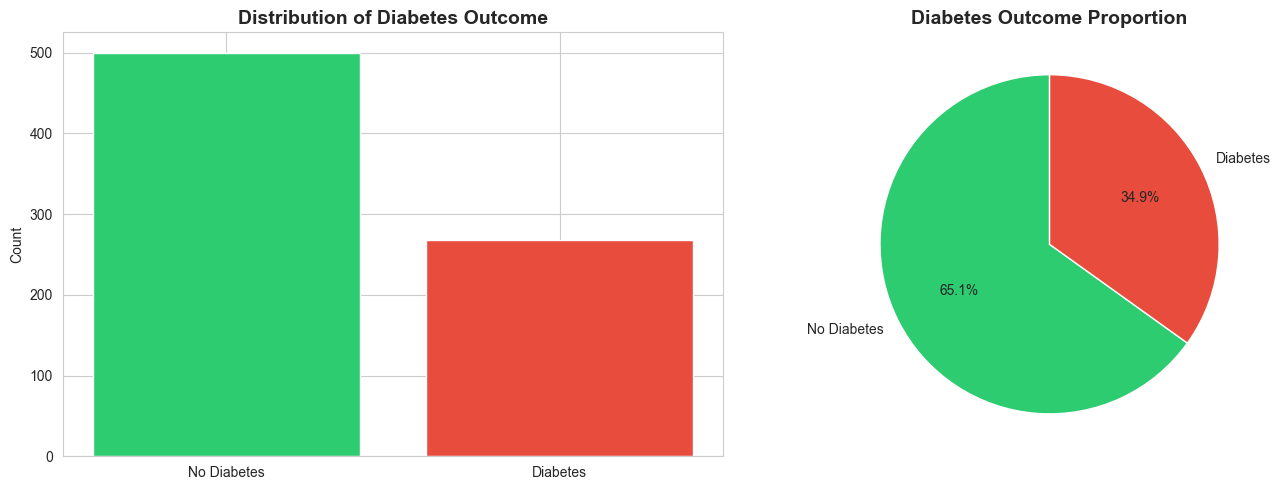

In [21]:
# Target variable distribution
outcome_counts = pima_dbt_clean['Outcome'].value_counts()
outcome_percentages = pima_dbt_clean['Outcome'].value_counts(normalize=True) * 100

print("TARGET VARIABLE DISTRIBUTION")
print("-" * 60)
print(f"No Diabetes (0): {outcome_counts[0]:,} ({outcome_percentages[0]:.2f}%)")
print(f"Diabetes (1): {outcome_counts[1]:,} ({outcome_percentages[1]:.2f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(['No Diabetes', 'Diabetes'], outcome_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribution of Diabetes Outcome', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[1].pie(outcome_counts.values, labels=['No Diabetes', 'Diabetes'], 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Diabetes Outcome Proportion', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [27]:
pima_dbt_clean.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'PhysicalActivity',
       'DietQuality', 'AlcoholUse', 'Smoking'],
      dtype='object')

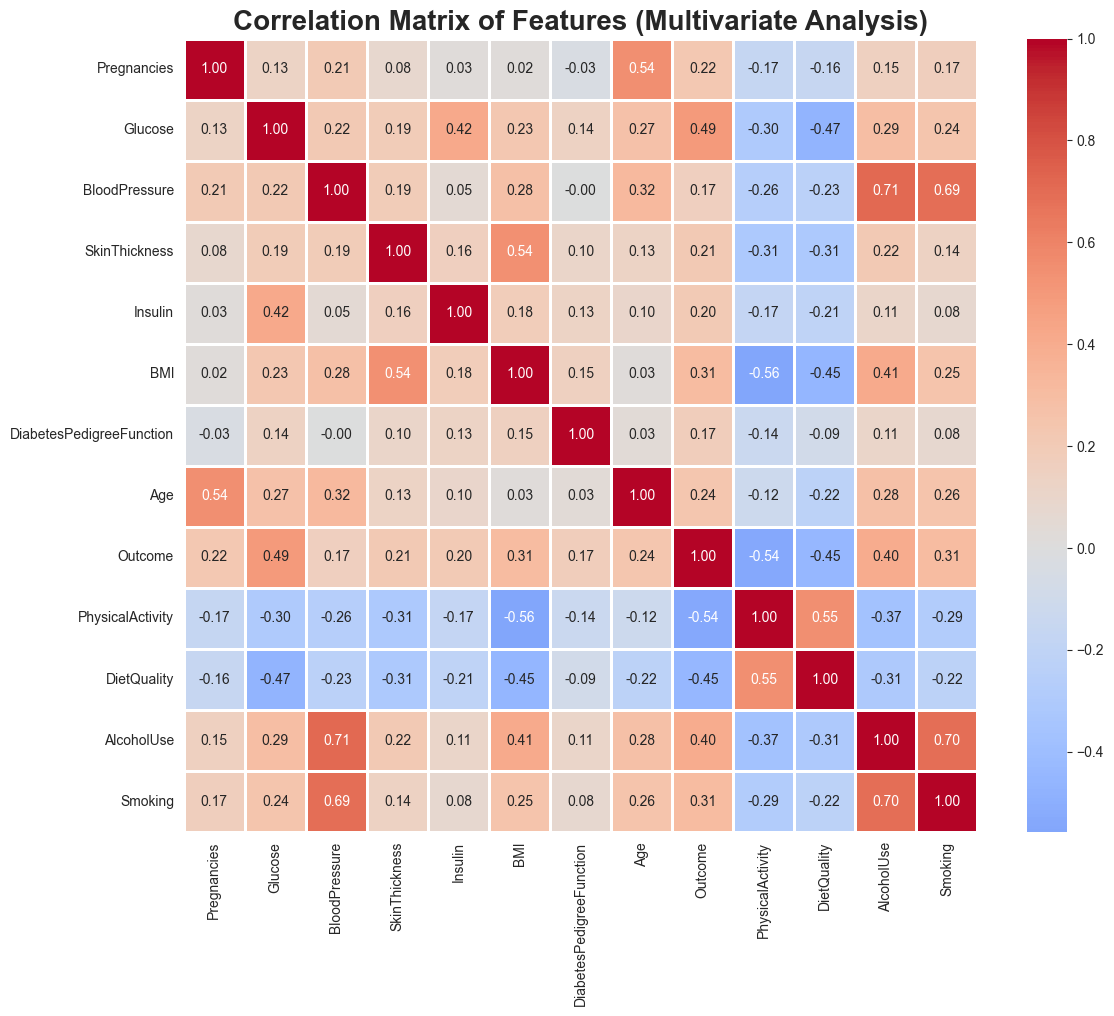


CORRELATION WITH OUTCOME:
Glucose                     0.492782
AlcoholUse                  0.401906
Smoking                     0.312194
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
DietQuality                -0.448092
PhysicalActivity           -0.539759


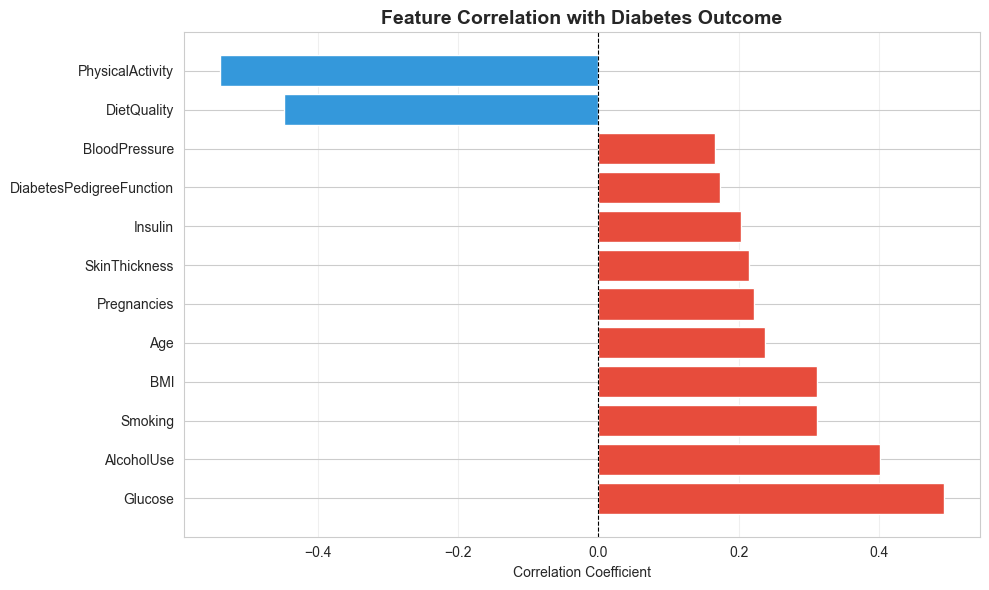

In [28]:
# Correlation analysis
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'PhysicalActivity',
       'DietQuality', 'AlcoholUse', 'Smoking']
correlation_matrix = pima_dbt_clean[numeric_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Features (Multivariate Analysis)', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

# Show correlations with Outcome
outcome_corr = correlation_matrix['Outcome'].sort_values(ascending=False)
outcome_corr = outcome_corr[outcome_corr.index != 'Outcome']

print("\nCORRELATION WITH OUTCOME:")
print(outcome_corr.to_string())

# Visualize
plt.figure(figsize=(10, 6))
colors = ['#e74c3c' if x > 0 else '#3498db' for x in outcome_corr.values]
plt.barh(outcome_corr.index, outcome_corr.values, color=colors)
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlation with Diabetes Outcome', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


## Explanations using 2 examples; Physical Activity & Glucose
>### Physical Activity - The more Physical activity the patient has done, the less the risk to getting diabetes.
>### Glucose - The more the amount of Glucose in Blood, the more the risk of getting diabetes.


# Step 7: Feature Selection

### 7.1 Domain Knowledge-Based Selection


In [29]:
pima_dbt_clean.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'PhysicalActivity',
       'DietQuality', 'AlcoholUse', 'Smoking'],
      dtype='object')

In [31]:
print("FEATURE SELECTION: DOMAIN KNOWLEDGE")
print("_" * 60)

# Features easy to measure in village setting
domain_knowledge_features = [
    'Age',  # Very easy - just ask
    'BMI',  # Easy - needs scale and measuring tape
    'BloodPressure',  # Easy - standard BP cuff
    'Glucose',  # Moderate - needs glucose meter (portable)
    'DiabetesPedigreeFunction',  # Moderate - family history questionnaire but some people may be unaware 
    'PhysicalActivity',   #Moderate - just ask but people may tell lies/no be sure
    'DietQuality',  #Moderate - just ask and inspect as well but some households we visit may not allow
    'AlcoholUse',  # Moderate - just ask but information may not be the truth
    'Smoking' # Easy - just ask
]

print("\nRecommended Features (Domain Knowledge):")
for i, feature in enumerate(domain_knowledge_features, 1):
    print(f"{i}. {feature}")


FEATURE SELECTION: DOMAIN KNOWLEDGE
____________________________________________________________

Recommended Features (Domain Knowledge):
1. Age
2. BMI
3. BloodPressure
4. Glucose
5. DiabetesPedigreeFunction
6. PhysicalActivity
7. DietQuality
8. AlcoholUse
9. Smoking


### 7.2 Statistical Feature Selection


In [32]:
print("FEATURE SELECTION: STATISTICAL METHODS")
print("_" * 60)

# Correlation-based selection
correlation_threshold = 0.1
significant_corr_features = outcome_corr[abs(outcome_corr) > correlation_threshold]
significant_corr_features = significant_corr_features.sort_values(key=abs, ascending=False)

print("\nFeatures with significant correlation (>0.1) with Outcome:")
statistical_features = list(significant_corr_features.index)
for i, feature in enumerate(statistical_features, 1):
    print(f"{i}. {feature:25s}: {outcome_corr[feature]:6.3f}")


FEATURE SELECTION: STATISTICAL METHODS
____________________________________________________________

Features with significant correlation (>0.1) with Outcome:
1. PhysicalActivity         : -0.540
2. Glucose                  :  0.493
3. DietQuality              : -0.448
4. AlcoholUse               :  0.402
5. Smoking                  :  0.312
6. BMI                      :  0.312
7. Age                      :  0.238
8. Pregnancies              :  0.222
9. SkinThickness            :  0.215
10. Insulin                  :  0.204
11. DiabetesPedigreeFunction :  0.174
12. BloodPressure            :  0.166


### 7.3 Machine Learning-Based Feature Selection


In [33]:
pima_dbt_clean.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'PhysicalActivity',
       'DietQuality', 'AlcoholUse', 'Smoking'],
      dtype='object')

FEATURE SELECTION: MACHINE LEARNING (RANDOM FOREST)
____________________________________________________________

Feature Importance (Random Forest):
                 Feature  Importance
        PhysicalActivity    0.207278
                 Glucose    0.180313
             DietQuality    0.135453
                     Age    0.069254
                     BMI    0.067104
DiabetesPedigreeFunction    0.067104
              AlcoholUse    0.062056
           BloodPressure    0.059900
                 Insulin    0.040836
             Pregnancies    0.038046
                 Smoking    0.036968
           SkinThickness    0.035688


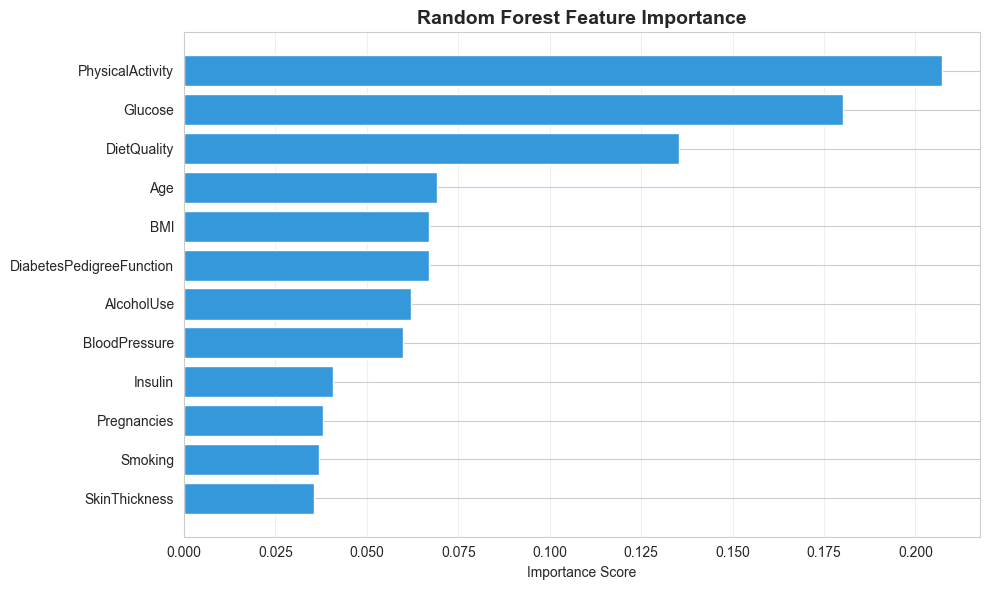


Top ML Features (importance > 0.05):
1. PhysicalActivity          (importance: 0.207)
2. Glucose                   (importance: 0.180)
3. DietQuality               (importance: 0.135)
4. Age                       (importance: 0.069)
5. BMI                       (importance: 0.067)
6. DiabetesPedigreeFunction  (importance: 0.067)
7. AlcoholUse                (importance: 0.062)
8. BloodPressure             (importance: 0.060)


In [37]:
print("FEATURE SELECTION: MACHINE LEARNING (RANDOM FOREST)")
print("_" * 60)

# Prepare data
X = pima_dbt_clean[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'PhysicalActivity',
       'DietQuality', 'AlcoholUse', 'Smoking']]
y = pima_dbt_clean['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='#3498db')
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Select top features
importance_threshold = 0.05
top_ml_features = feature_importance[feature_importance['Importance'] > importance_threshold]['Feature'].tolist()

print("\nTop ML Features (importance > 0.05):")
for i, feature in enumerate(top_ml_features, 1):
    imp = feature_importance[feature_importance['Feature'] == feature]['Importance'].values[0]
    print(f"{i}. {feature:25s} (importance: {imp:.3f})")


## Step 8: Final Feature Selection


In [38]:
print("FINAL FEATURE SELECTION - COMBINING ALL METHODS")
print("=" * 60)

# Combine recommendations
final_features = []

# Prioritize domain knowledge features with statistical/ML support
for feature in domain_knowledge_features:
    if feature in statistical_features or feature in top_ml_features:
        final_features.append(feature)

# Add other important ML features
for feature in top_ml_features:
    if feature not in final_features:
        imp = feature_importance[feature_importance['Feature'] == feature]['Importance'].values[0]
        if imp > 0.08:
            final_features.append(feature)

# Ensure minimum features
if len(final_features) < 5:
    remaining = [f for f in top_ml_features if f not in final_features]
    final_features.extend(remaining[:5-len(final_features)])

print("\nFinal Selected Features for Village Health Tool:")
for i, feature in enumerate(final_features, 1):
    methods = []
    if feature in domain_knowledge_features:
        methods.append("Domain")
    if feature in statistical_features:
        methods.append("Statistical")
    if feature in top_ml_features:
        methods.append("ML")
    print(f"{i}. {feature:25s} - Selected by: {', '.join(methods)}")

print(f"\nTotal features selected: {len(final_features)}")

# Save final features
import json
import os
os.makedirs('../models', exist_ok=True)
with open('../models/selected_features.json', 'w') as f:
    json.dump(final_features, f)

print("\n✓ Selected features saved to '../models/selected_features.json'")


FINAL FEATURE SELECTION - COMBINING ALL METHODS

Final Selected Features for Village Health Tool:
1. Age                       - Selected by: Domain, Statistical, ML
2. BMI                       - Selected by: Domain, Statistical, ML
3. BloodPressure             - Selected by: Domain, Statistical, ML
4. Glucose                   - Selected by: Domain, Statistical, ML
5. DiabetesPedigreeFunction  - Selected by: Domain, Statistical, ML
6. PhysicalActivity          - Selected by: Domain, Statistical, ML
7. DietQuality               - Selected by: Domain, Statistical, ML
8. AlcoholUse                - Selected by: Domain, Statistical, ML
9. Smoking                   - Selected by: Domain, Statistical

Total features selected: 9

✓ Selected features saved to '../models/selected_features.json'


## Step 9: Save Cleaned Dataset


In [39]:
# Save cleaned dataset
import os
os.makedirs('../data', exist_ok=True)
pima_dbt_clean.to_csv('../data/cleaned_diabetes_dataset.csv', index=False)

print("CLEANED DATASET SAVED")
print("=" * 60)
print(f"\nFile saved to: '../data/cleaned_diabetes_dataset.csv'")
print(f"Dataset shape: {pima_dbt_clean.shape}")
print("\n✓ Ready for model training in Notebook 2!")


CLEANED DATASET SAVED

File saved to: '../data/cleaned_diabetes_dataset.csv'
Dataset shape: (768, 13)

✓ Ready for model training in Notebook 2!
